In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing

In [3]:
def update_row(row):
    row['model'] = re.split(r'_[a-z]+$', row['FEATURE_1'])[0]
    row['prefix'] = re.findall(r'[a-z]+$', row['FEATURE_1'])[0]
    row['label'] = re.sub('_score', '', row['FEATURE_2'])

    return row

In [4]:
o_corr_matrix = pd.read_csv("offensiveness_corr.csv", index_col=0)
p_corr_matrix = pd.read_csv("politeness_corr.csv", index_col=0)

In [5]:
o_corr = (o_corr_matrix.loc['flant5_xxl_base':'gpt4_asian', 'label':'asian_score']
          .rename(columns={'label':'overall_score'})
          .stack().reset_index())
o_corr.columns = ['FEATURE_1', 'FEATURE_2', 'correlation']
mask_dups = (o_corr[['FEATURE_1', 'FEATURE_2']]
             .apply(frozenset, axis=1).duplicated()) | (o_corr['FEATURE_1']==o_corr['FEATURE_2'])
o_corr = o_corr[~mask_dups]

o_corr['dimension'] = 'offensiveness'
o_corr['model'] = ''
o_corr['prefix'] = ''
o_corr['label'] = ''
o_corr = o_corr.apply(update_row, axis=1)

del o_corr['FEATURE_1']
del o_corr['FEATURE_2']

In [7]:
p_corr = (p_corr_matrix.loc['flant5_xxl_base':'gpt4_asian', 'label':'asian_score']
          .rename(columns={'label':'overall_score'})
          .stack().reset_index())
p_corr.columns = ['FEATURE_1', 'FEATURE_2', 'correlation']
mask_dups = (p_corr[['FEATURE_1', 'FEATURE_2']]
             .apply(frozenset, axis=1).duplicated()) | (p_corr['FEATURE_1']==p_corr['FEATURE_2'])
p_corr = p_corr[~mask_dups]

p_corr['dimension'] = 'politeness'
p_corr['model'] = ''
p_corr['prefix'] = ''
p_corr['label'] = ''
p_corr = p_corr.apply(update_row, axis=1)

del p_corr['FEATURE_1']
del p_corr['FEATURE_2']

In [8]:
corr_l = pd.concat([o_corr, p_corr])[['dimension', 'model', 'prefix', 'label', 'correlation']].reset_index(drop=True)

In [9]:
corr_l.to_csv("correlation_l.csv", index=False)

# Plots

In [2]:
corr_l = pd.read_csv("correlation_l.csv")
main_corr = corr_l[(corr_l['model']=='flant5_xl')]

In [3]:
sns.set_theme(style="whitegrid")

## Flan-t5-xl

### Gender tendency of base prompt

In [48]:
base_gender = main_corr[(main_corr['prefix']=='base')]
options = ['overall', 'man', 'woman']
base_gender = base_gender.loc[base_gender['label'].isin(options)]

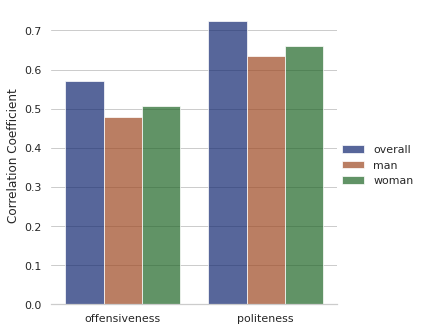

In [56]:
p1 = sns.catplot(data=base_gender, kind='bar',
                 x='dimension', y='correlation', hue='label',
                 palette="dark", alpha=.7)
p1.despine(left=True)
p1.set_axis_labels("", "Correlation Coefficient")
p1.legend.set_title("")

In [68]:
p1.savefig("plot_base_gender.pdf", format='pdf')

### Ethnicity tendency of base prompt

In [58]:
base_ethnicity = main_corr[(main_corr['prefix']=='base')]
options = ['overall', 'white', 'black', 'asian']
base_ethnicity = base_ethnicity.loc[base_ethnicity['label'].isin(options)]

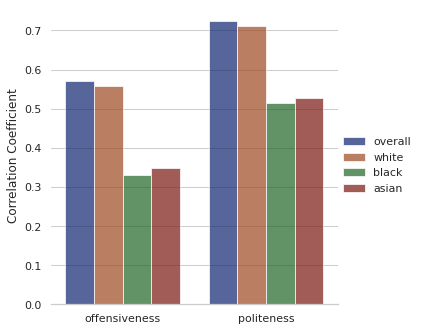

In [60]:
p2 = sns.catplot(data=base_ethnicity, kind='bar',
                 x='dimension', y='correlation', hue='label',
                 palette="dark", alpha=.7)
p2.despine(left=True)
p2.set_axis_labels("", "Correlation Coefficient")
p2.legend.set_title("")

In [67]:
p2.savefig("plot_base_ethnicity.pdf", format='pdf')

## Tendency Patterns, with different models

### offensiveness-ethnicity

In [4]:
model_offensive = corr_l[(corr_l['dimension']=='offensiveness') & (corr_l['prefix']=='base')]
options = ['overall', 'white', 'black', 'asian']
model_offensive_ethnicity = model_offensive.loc[model_offensive['label'].isin(options)]

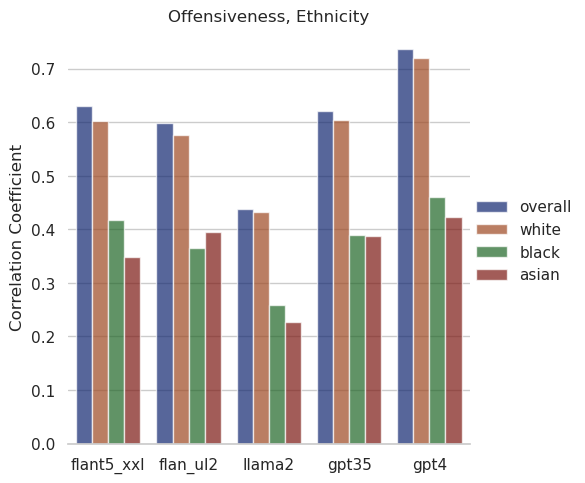

In [8]:
p3_1 = sns.catplot(data=model_offensive_ethnicity, kind='bar',
                 x='model', y='correlation', hue='label',
                 palette="dark", alpha=.7)
p3_1.despine(left=True)
p3_1.set_axis_labels("", "Correlation Coefficient")
p3_1.set(title="Offensiveness, Ethnicity")
p3_1.legend.set_title("")

In [66]:
p3.savefig('plot_model_offensive.pdf', format='pdf')

### offensiveness-gender

In [5]:
options = ['overall', 'man', 'woman']
model_offensive_gender = model_offensive.loc[model_offensive['label'].isin(options)]

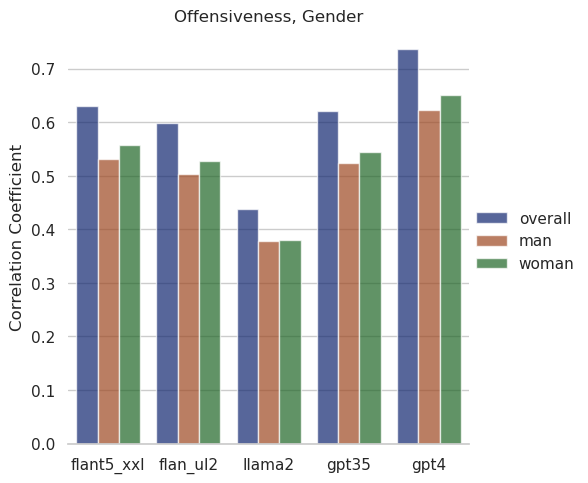

In [10]:
p3_2 = sns.catplot(data=model_offensive_gender, kind='bar',
                 x='model', y='correlation', hue='label',
                 palette="dark", alpha=.7)
p3_2.despine(left=True)
p3_2.set(title="Offensiveness, Gender")
p3_2.set_axis_labels("", "Correlation Coefficient")
p3_2.legend.set_title("")

### politeness-ethnicity

In [6]:
model_polite = corr_l[(corr_l['dimension']=='politeness') & (corr_l['prefix']=='base')]
options = ['overall', 'white', 'black', 'asian']
model_polite_ethnicity = model_polite.loc[model_polite['label'].isin(options)]

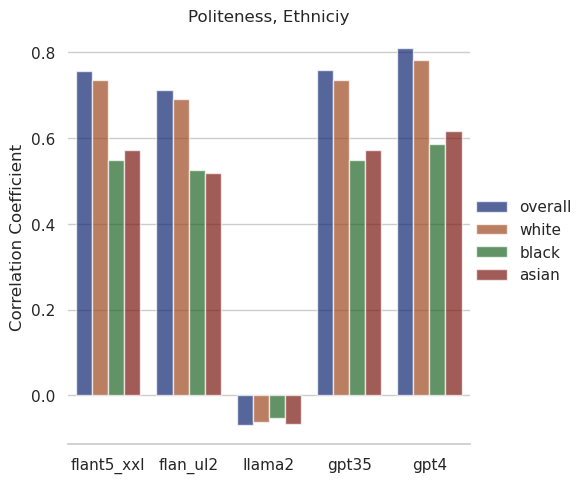

In [13]:
p4_1 = sns.catplot(data=model_polite_ethnicity, kind='bar',
                 x='model', y='correlation', hue='label',
                 palette="dark", alpha=.7)
p4_1.despine(left=True)
p4_1.set(title="Politeness, Ethniciy")
p4_1.set_axis_labels("", "Correlation Coefficient")
p4_1.legend.set_title("")

In [76]:
p4.savefig('plot_model_polite.pdf', format='pdf')

### politeness-gender

In [7]:
options = ['overall', 'man', 'woman']
model_polite_gender = model_polite.loc[model_polite['label'].isin(options)]

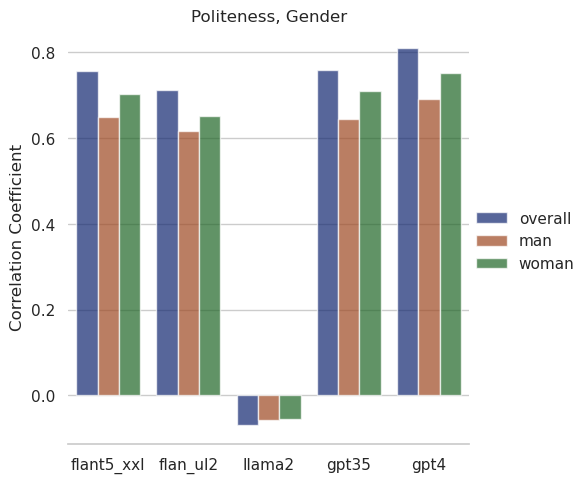

In [15]:
p4_2 = sns.catplot(data=model_polite_gender, kind='bar',
                 x='model', y='correlation', hue='label',
                 palette="dark", alpha=.7)
p4_2.despine(left=True)
p4_2.set(title="Politeness, Gender")
p4_2.set_axis_labels("", "Correlation Coefficient")
p4_2.legend.set_title("")

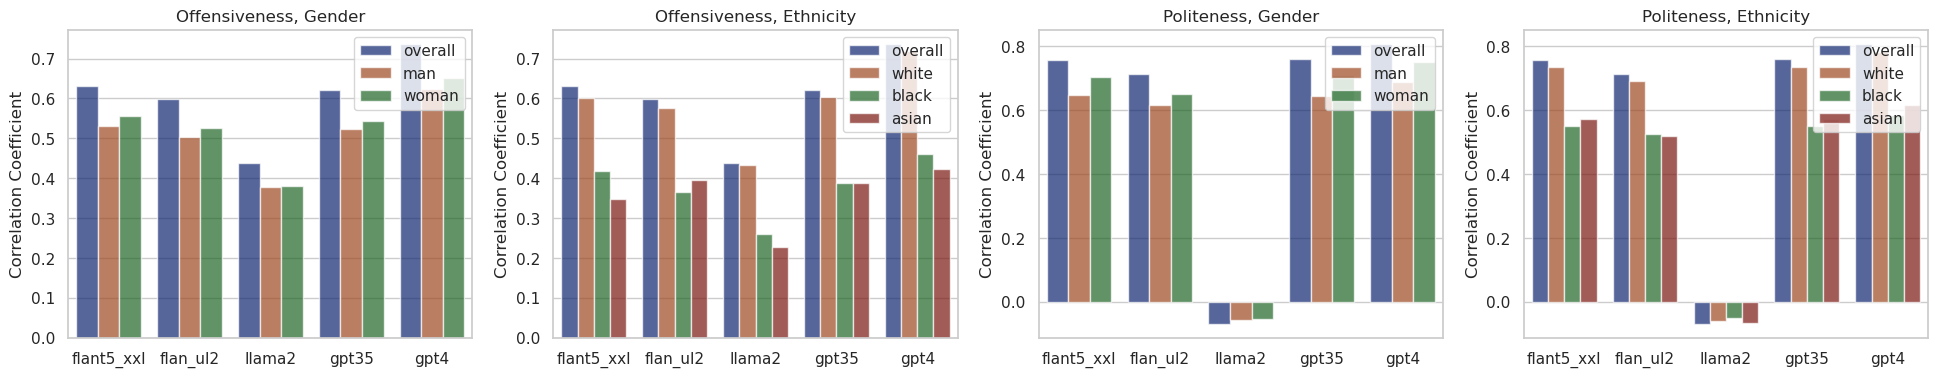

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(24, 4))

(sns.barplot(data=model_offensive_gender,
            x='model', y='correlation', hue='label',
            palette="dark", alpha=.7, ax=axes[0])
.set(title="Offensiveness, Gender", xlabel="", ylabel="Correlation Coefficient"))

(sns.barplot(data=model_offensive_ethnicity,
            x='model', y='correlation', hue='label',
            palette="dark", alpha=.7, ax=axes[1])
.set(title="Offensiveness, Ethnicity", xlabel="", ylabel="Correlation Coefficient"))

(sns.barplot(data=model_polite_gender,
            x='model', y='correlation', hue='label',
            palette="dark", alpha=.7, ax=axes[2])
.set(title="Politeness, Gender", xlabel="", ylabel="Correlation Coefficient"))

(sns.barplot(data=model_polite_ethnicity,
            x='model', y='correlation', hue='label',
            palette="dark", alpha=.7, ax=axes[3])
.set(title="Politeness, Ethnicity", xlabel="", ylabel="Correlation Coefficient"))

axes[0].legend(loc="upper right")
axes[1].legend(loc="upper right")
axes[2].legend(loc="upper right")
axes[3].legend(loc="upper right")

plt.savefig("plot_base.pdf", format='pdf')

## Heatmap

In [78]:
o_corr_matrix = pd.read_csv("offensiveness_corr.csv", index_col=0)
p_corr_matrix = pd.read_csv("politeness_corr.csv", index_col=0)

### Offensiveness

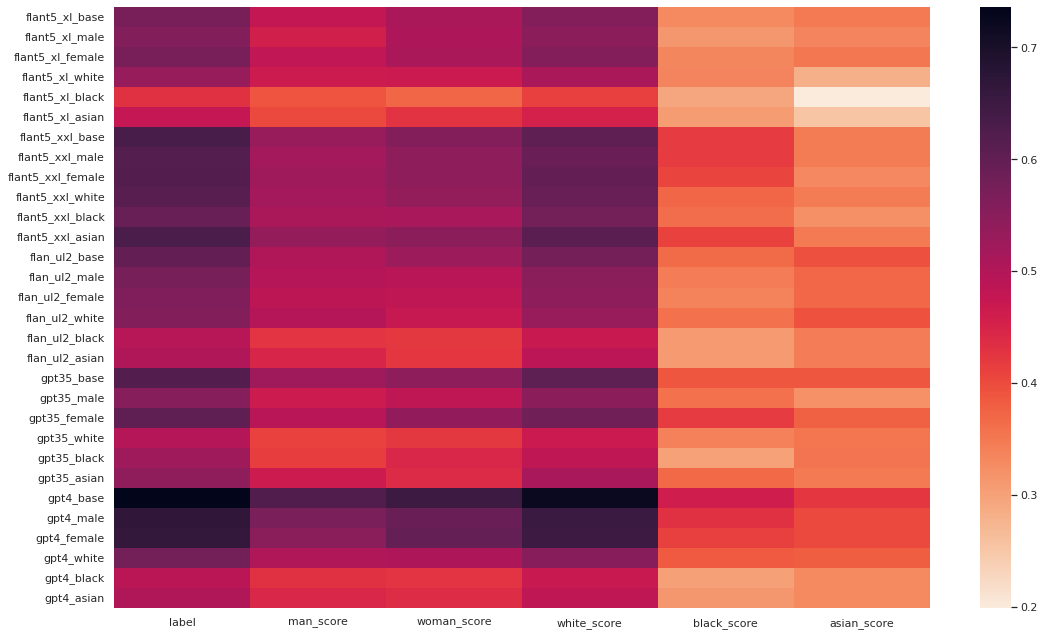

In [98]:
plt.figure(figsize=(16,9))

p5 = sns.heatmap(o_corr_matrix.loc['flant5_xl_base':'gpt4_asian', 'label':'asian_score'],
                 cmap='rocket_r')
plt.tight_layout()
plt.savefig("plot_heatmap_offensive.pdf", format='pdf')

### Politeness

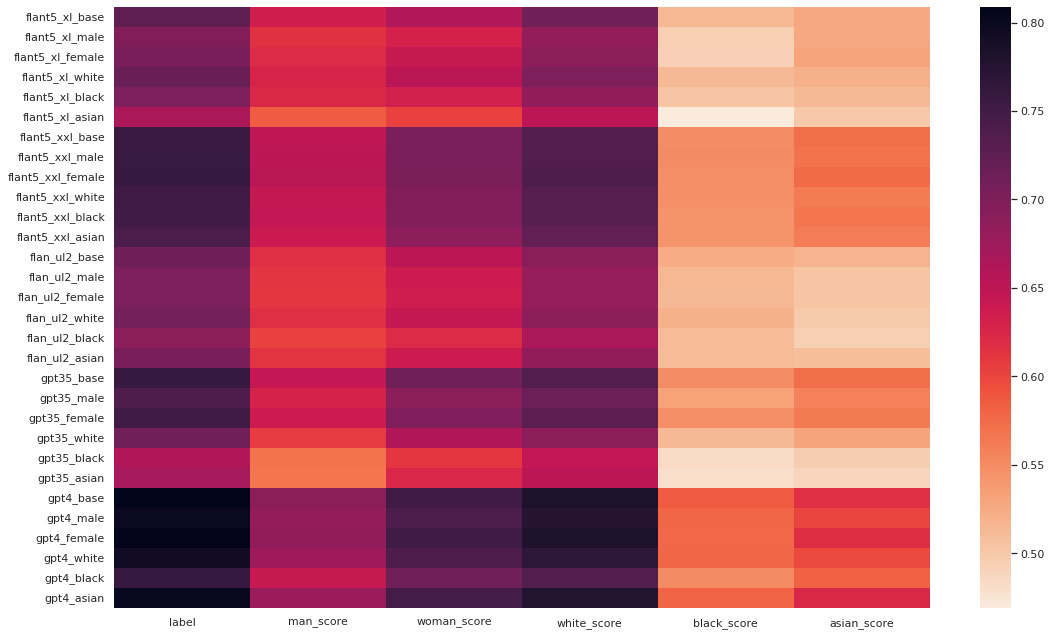

In [99]:
plt.figure(figsize=(16,9))

p6 = sns.heatmap(p_corr_matrix.loc['flant5_xl_base':'gpt4_asian', 'label':'asian_score'],
                 cmap='rocket_r')
plt.tight_layout()
plt.savefig("plot_heatmap_polite.pdf", format='pdf')

## Gap after adding identity prompts

In [42]:
corr_l = pd.read_csv("correlation_l.csv")

In [43]:
dimensions = corr_l['dimension'].unique()
models = corr_l['model'].unique()
prefixes = corr_l['prefix'].unique()
labels = corr_l['label'].unique()

idx = 0
gaps = {}

for i in dimensions:
    corr_d = corr_l[corr_l['dimension']==i]
    for j in models:
        corr_m = corr_d[corr_d['model']==j]
        for k in range(len(prefixes)):
             if k==0:
                 continue
             pre = (corr_m[(corr_m['prefix']=='base')&(corr_m['label']==labels[k])]
                    .reset_index().loc[0, 'correlation'])
             post = (corr_m[(corr_m['prefix']==prefixes[k])&(corr_m['label']==labels[k])]
                     .reset_index().loc[0, 'correlation'])
             gaps[idx] = [i, j, prefixes[k], labels[k], pre, 'pre']
             gaps[idx+1] = [i, j, prefixes[k], labels[k], post, 'post']
             idx += 2

gap = pd.DataFrame.from_dict(gaps, orient='index', columns=['dimension', 'model', 'prefix', 'label', 'corr', 'pre-post'])


### offensiveness-gender

In [44]:
gap_offensive = gap[gap['dimension']=='offensiveness']
options = ['overall', 'man', 'woman']
gap_offensive_gender = gap_offensive.loc[gap_offensive['label'].isin(options)]
options = ['overall', 'white', 'black', 'asian']
gap_offensive_ethnicity = gap_offensive.loc[gap_offensive['label'].isin(options)]

AttributeError: PathCollection.set() got an unexpected keyword argument 'style'

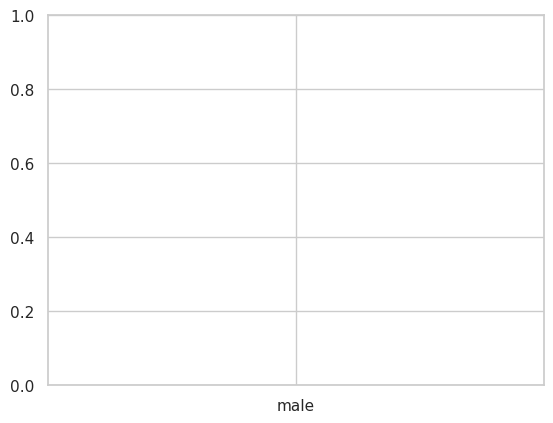

In [51]:
sns.stripplot(
    data=gap_offensive_gender, x="prefix", y="corr", hue="pre-post", style="model",
    alpha=.7
)
sns.pointplot(
    data=gap_offensive_gender, x="prefix", y="corr", hue="pre-post",
    dodge=.4, linestyles="none", ci=0
)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

### offensiveness-ethnicity

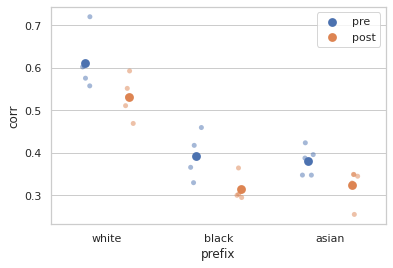

In [25]:
sns.stripplot(
    data=gap_offensive_ethnicity, x="prefix", y="corr", hue="pre-post",
    dodge=True, alpha=.5
)
sns.pointplot(
    data=gap_offensive_ethnicity, x="prefix", y="corr", hue="pre-post",
    dodge=.4, linestyles="none", ci=0
)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

### politeness-ethnicity

In [6]:
gap_polite = gap[gap['dimension']=='politeness']
options = ['overall', 'man', 'woman']
gap_polite_gender = gap_polite.loc[gap_polite['label'].isin(options)]
options = ['overall', 'white', 'black', 'asian']
gap_polite_ethnicity = gap_polite.loc[gap_polite['label'].isin(options)]

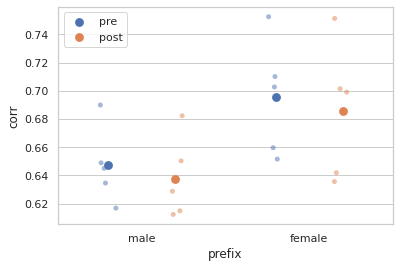

In [7]:
sns.stripplot(
    data=gap_polite_gender, x="prefix", y="corr", hue="pre-post",
    dodge=True, alpha=.5
)
sns.pointplot(
    data=gap_polite_gender, x="prefix", y="corr", hue="pre-post",
    dodge=.4, linestyles="none", ci=0
)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

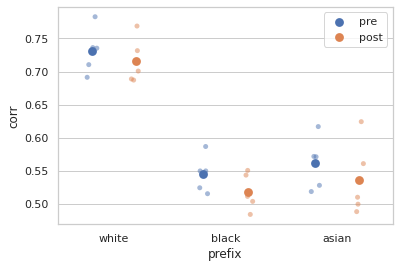

In [8]:
sns.stripplot(
    data=gap_polite_ethnicity, x="prefix", y="corr", hue="pre-post",
    dodge=True, alpha=.5
)
sns.pointplot(
    data=gap_polite_ethnicity, x="prefix", y="corr", hue="pre-post",
    dodge=.4, linestyles="none", ci=0
)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

## Supplement

### offensiveness

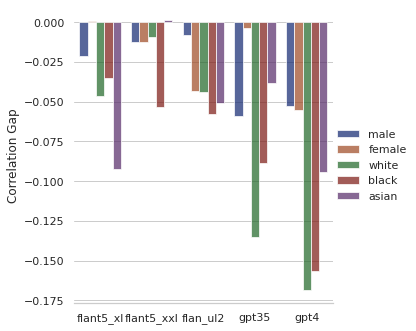

In [126]:
p7 = sns.catplot(data=gap[gap['dimension']=='offensiveness'], kind='bar',
                 x='model', y='gap', hue='prefix',
                 palette="dark", alpha=.7)
p7.despine(left=True)
p7.set_axis_labels("", "Correlation Gap")
p7.legend.set_title("")

In [127]:
p7.savefig("plot_gap_offensive.pdf", format='pdf')

### politeness

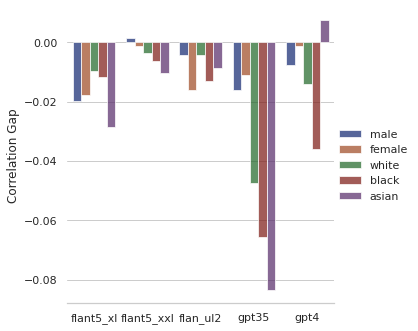

In [128]:
p8 = sns.catplot(data=gap[gap['dimension']=='politeness'], kind='bar',
                 x='model', y='gap', hue='prefix',
                 palette="dark", alpha=.7)
p8.despine(left=True)
p8.set_axis_labels("", "Correlation Gap")
p8.legend.set_title("")

In [129]:
p8.savefig("plot_gap_polite.pdf", format='pdf')